In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
table = pd.read_excel('P4-2_DopplerWaveform.xlsx')
calibration = pd.read_table('HGL-0085-SN1020_C20_20060405.txt')

V = np.array(table[:][2])
V = V[1:-1]
t = np.array(table['x-axis'])
t = t[1:-1]

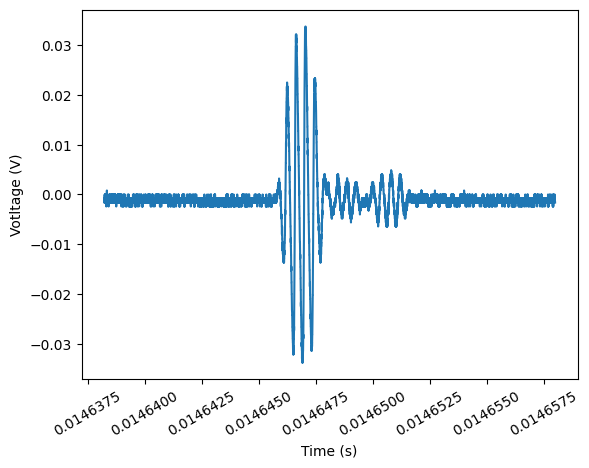

In [4]:
plt.plot(t,V)
plt.ylabel("Votltage (V)")
plt.xlabel("Time (s)")
plt.xticks(rotation =30, visible = True)
plt.show()

In [5]:
conv = calibration.to_numpy()
conv = conv[:,0:3]
freq = conv[:,0]
VtoPa = conv[:,2]
index = int(sum(np.where(freq == 2.5)))
convFactor = VtoPa[30]
print(1/convFactor)

121373953.14965408


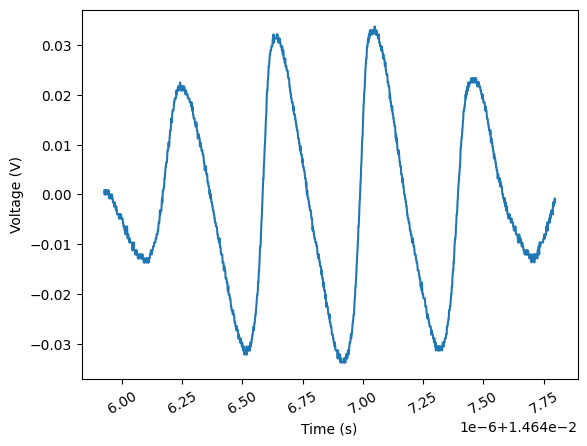

In [6]:
start = int(sum(np.where(t == .01464594)))
stop = int(sum(np.where(t == .0146478)))

V_new = V[start - 11:stop - 1]
t_new = t[start - 11:stop - 1]

plt.plot(t_new,V_new)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.xticks(rotation= 30, visible = True)
plt.show()

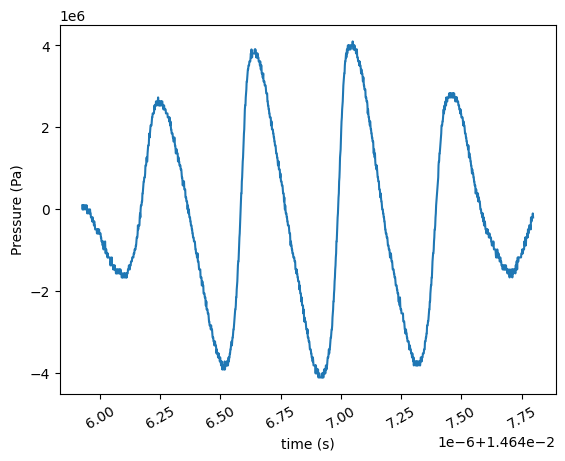

In [7]:
dt = t[1]-t[0]
Pa = (1/convFactor) * V_new
Pa = Pa - 1.2

plt.plot(t_new,Pa)
plt.xlabel("time (s)")
plt.ylabel("Pressure (Pa)")
plt.xticks(rotation = 30, visible = True)
Pa_s = np.square(Pa)


# PII

In [8]:
integral = sum(dt * Pa_s)
rho = 1000
c = 1428
PII = integral/(rho*c)
print(str(PII) + " W*s/m^2")

6.684950019556911 W*s/m^2


# Mechanical Index

In [9]:
f = 2.5 #MHz
p_neg = 4 #MPa
MI = p_neg/np.sqrt(f)
print(MI)

2.5298221281347035


# I_sppa

In [10]:
PD = t_new[-1]-t_new[0]
I_sppa = PII/PD
print(str(I_sppa) + " W/m^2")

3572451.58025681 W/m^2


# I_spta

In [11]:
tau = PD*3000
I_spta = I_sppa * tau
print(str(I_spta) + " W/m^2")

20054.850058670734 W/m^2


# Derated Values

In [12]:
alpha = .3
dist = 7
f = 2.5
dB = alpha * dist * f
der = np.exp(-dB/8.686)
p_new = Pa * der
P_new_s = np.square(p_new)
print(der)

0.546390745984905


# PII

In [13]:
integral = sum(dt * P_new_s)
rho = 1000
c = 1428
PII = integral/(rho*c)
print(str(PII) + " W*s/m^2")

1.9957440128829502 W*s/m^2


# Mechanical Index

In [14]:
f = 2.5 #MHz
p_neg = abs(min(p_new))/(10**6) #MPa
MI = p_neg/np.sqrt(f)
print(MI)

1.4163630328871448


# I_sppa

In [15]:
PD = t_new[-1]-t_new[0]
I_sppa = PII/PD
print(str(I_sppa * (10**-4)) + " W/cm^2")

106.65298666038986 W/cm^2


# I_spta

In [16]:
tau = PD*3000
I_spta = I_sppa * tau
I_spta = I_spta * (10**-4)/(10**-3)
print(str(I_spta) + " mW/cm^2")

598.723203864885 mW/cm^2


# Thermal Index

In [17]:
A = (15 * 10**-3) * (25 * 10**-3)
W0 = (PII*10**3) * A
TI = W0/(210/f)
print(TI)

0.0089095714860846
